### IMPORTS


In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
from datetime import timedelta

## Loading Dataset

In [2]:
NOAA_20_file = "data/NOAA_20_{year}.csv"
SNPP_file = "data/SNPP_{year}.csv"
NOAA_20_data = []
SNPP_data = []

for year in [2019, 2021, 2022, 2023, 2024]:
    NOAA_20_filename = NOAA_20_file.format(year=year)
    SNPP_filename = SNPP_file.format(year=year)
    # Read the NOAA-20 data and the SNPP data
    firms_data_NOAA_20 = pd.read_csv(NOAA_20_filename)
    firms_data_SNPP = pd.read_csv(SNPP_filename)
    # Append the data to the list
    NOAA_20_data.append(firms_data_NOAA_20)
    SNPP_data.append(firms_data_SNPP)

NOAA_20_data = pd.concat(NOAA_20_data, ignore_index=True)
SNPP_data = pd.concat(SNPP_data, ignore_index=True)

In [3]:
NOAA_20_data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,47.79976,-53.99381,304.80,0.38,0.36,2019-01-01,539,N20,VIIRS,n,2,263.57,1.38,N,2
1,46.52091,-84.39311,328.11,0.46,0.39,2019-01-01,721,N20,VIIRS,n,2,261.14,4.65,N,0
2,58.57620,-122.58728,312.38,0.39,0.36,2019-01-01,1040,N20,VIIRS,n,2,265.10,1.14,N,0
3,57.02739,-122.92043,327.14,0.40,0.37,2019-01-01,1040,N20,VIIRS,n,2,271.05,5.77,N,0
4,55.45625,-116.73504,295.05,0.40,0.44,2019-01-01,1040,N20,VIIRS,n,2,266.42,0.93,N,0


In [4]:
NOAA_20_data.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
3325252,43.27456,-79.80665,298.30,0.38,0.36,2024-12-31,714,N20,VIIRS,n,2,275.57,0.72,N,3
3325253,43.27311,-79.79729,310.45,0.38,0.36,2024-12-31,714,N20,VIIRS,n,2,274.66,1.71,N,3
3325254,43.27128,-79.80759,295.83,0.38,0.36,2024-12-31,714,N20,VIIRS,n,2,276.14,1.06,N,3
3325255,43.26801,-79.80854,316.26,0.38,0.36,2024-12-31,714,N20,VIIRS,n,2,276.59,1.06,N,3
3325256,53.86443,-101.19816,326.80,0.39,0.36,2024-12-31,852,N20,VIIRS,n,2,262.00,4.91,N,0


In [5]:
SNPP_data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,50.52198,-104.63961,340.97,0.35,0.56,2019-01-01,811,N,VIIRS,n,2,249.99,3.40,N,2
1,58.02918,-116.75737,322.70,0.43,0.38,2019-01-01,950,N,VIIRS,n,2,266.24,1.36,N,0
2,55.05537,-118.55580,335.59,0.44,0.38,2019-01-01,951,N,VIIRS,n,2,272.81,5.44,N,0
3,55.05296,-118.53534,313.18,0.44,0.38,2019-01-01,951,N,VIIRS,n,2,271.66,1.54,N,0
4,55.05107,-118.55022,318.29,0.44,0.38,2019-01-01,951,N,VIIRS,n,2,272.62,2.34,N,0


In [6]:
print("NOAA 20 Data:")
NOAA_20_data.info()

NOAA 20 Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3325257 entries, 0 to 3325256
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   latitude    float64
 1   longitude   float64
 2   brightness  float64
 3   scan        float64
 4   track       float64
 5   acq_date    object 
 6   acq_time    int64  
 7   satellite   object 
 8   instrument  object 
 9   confidence  object 
 10  version     int64  
 11  bright_t31  float64
 12  frp         float64
 13  daynight    object 
 14  type        int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 380.5+ MB


In [7]:
print("SNPP Data:")
SNPP_data.info()

SNPP Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303773 entries, 0 to 3303772
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   latitude    float64
 1   longitude   float64
 2   brightness  float64
 3   scan        float64
 4   track       float64
 5   acq_date    object 
 6   acq_time    int64  
 7   satellite   object 
 8   instrument  object 
 9   confidence  object 
 10  version     int64  
 11  bright_t31  float64
 12  frp         float64
 13  daynight    object 
 14  type        int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 378.1+ MB


## Removing unncessary columns

In [8]:
columns_to_remove = ["brightness", "satellite", "instrument", "version", "daynight", "type"]
NOAA_20_data.drop(columns=columns_to_remove, inplace=True)
SNPP_data.drop(columns=columns_to_remove, inplace=True)

In [9]:
print(NOAA_20_data.isnull().sum())
print(SNPP_data.isnull().sum())

latitude      0
longitude     0
scan          0
track         0
acq_date      0
acq_time      0
confidence    0
bright_t31    0
frp           0
dtype: int64
latitude      0
longitude     0
scan          0
track         0
acq_date      0
acq_time      0
confidence    0
bright_t31    0
frp           0
dtype: int64


In [10]:
NOAA_20_data.describe()

,latitude,longitude,scan,track,acq_time,bright_t31,frp
count,3.325257e+06,3.325257e+06,3.325257e+06,3.325257e+06,3.325257e+06,3.325257e+06,3.325257e+06
mean,5.757943e+01,-1.119839e+02,4.601980e-01,4.756544e-01,1.385250e+03,2.908740e+02,1.534822e+01
std,4.816947e+00,1.472981e+01,8.710759e-02,1.140374e-01,5.265270e+02,1.213863e+01,4.188038e+01
min,4.179167e+01,-1.410038e+02,3.200000e-01,3.600000e-01,4.170000e+02,2.257500e+02,0.000000e+00
25%,5.380338e+01,-1.210041e+02,3.900000e-01,3.800000e-01,9.370000e+02,2.839200e+02,1.840000e+00
50%,5.827735e+01,-1.160703e+02,4.400000e-01,4.400000e-01,1.101000e+03,2.891900e+02,4.170000e+00
75%,6.057592e+01,-1.064319e+02,5.100000e-01,5.500000e-01,1.948000e+03,2.969100e+02,1.112000e+01
max,8.121883e+01,-5.266324e+01,8.000000e-01,7.800000e-01,2.346000e+03,3.811700e+02,2.827690e+03


In [11]:
SNPP_data.describe()

,latitude,longitude,scan,track,acq_time,bright_t31,frp
count,3.303773e+06,3.303773e+06,3.303773e+06,3.303773e+06,3.303773e+06,3.303773e+06,3.303773e+06
mean,5.755415e+01,-1.119821e+02,4.598148e-01,4.743285e-01,1.397188e+03,2.909532e+02,1.508601e+01
std,4.793454e+00,1.478546e+01,8.703119e-02,1.158817e-01,5.276608e+02,1.222997e+01,3.928800e+01
min,4.175556e+01,-1.410039e+02,3.200000e-01,3.600000e-01,4.230000e+02,1.500000e+02,-1.900000e+00
25%,5.372479e+01,-1.210380e+02,3.900000e-01,3.700000e-01,9.400000e+02,2.839300e+02,1.850000e+00
50%,5.825739e+01,-1.161627e+02,4.400000e-01,4.300000e-01,1.105000e+03,2.892300e+02,4.250000e+00
75%,6.051714e+01,-1.063722e+02,5.100000e-01,5.500000e-01,1.954000e+03,2.970300e+02,1.143000e+01
max,8.256747e+01,-5.266550e+01,8.000000e-01,7.800000e-01,2.346000e+03,3.893800e+02,4.191100e+03


In [12]:
## Filtering out points with low confidence
rows = (NOAA_20_data.shape[0], SNPP_data.shape[0])

#Cleaning the data
NOAA_20_data = NOAA_20_data[NOAA_20_data['confidence'].isin(['n', 'h'])]
SNPP_data = SNPP_data[SNPP_data['confidence'].isin(['n', 'h'])]
NOAA_20_data = NOAA_20_data[NOAA_20_data['frp'] != 0]
SNPP_data = SNPP_data[SNPP_data['frp'] != 0]

rows_after = (NOAA_20_data.shape[0], SNPP_data.shape[0])
print(f"Rows before filtering: {rows}")
print(f"Rows after filtering: {rows_after}")
print("NOAA Rows removed: ", rows[0] - rows_after[0])
print("SNPP Rows removed: ", rows[1] - rows_after[1])

Rows before filtering: (3325257, 3303773)
Rows after filtering: (3188531, 3169368)
NOAA Rows removed:  136726
SNPP Rows removed:  134405


## spatial join for all wildfires

In [21]:
# Convert acquisition date to datetime format
NOAA_20_data['acq_date'] = pd.to_datetime(NOAA_20_data['acq_date'])

# Step 2: Load the Canada provinces shapefile
# Note: Adjust the path and layer details based on your file.
provinces = gpd.read_file("data/province_Data/gpr_000b11a_e.shp")

# Inspect the provinces GeoDataFrame to see which column contains the province name.
print(provinces.columns)

# Step 3: Convert FIRMS data to a GeoDataFrame using the latitude and longitude columns
fire_gdf = gpd.GeoDataFrame(
    NOAA_20_data, 
    geometry=gpd.points_from_xy(NOAA_20_data.longitude, NOAA_20_data.latitude),
    crs="EPSG:4326"
)

# Step 4: Spatially join the fire points with the province boundaries
# This attaches the province information to each fire record based on location.
fire_with_province = gpd.sjoin(fire_gdf, provinces, how="left", predicate="intersects")

# Make sure the output directory exists
os.makedirs("./provincedata", exist_ok=True)

# Save the joined GeoDataFrame as a CSV
fire_with_province.to_csv("./data/fires_with_provinces.csv", index=False)

fire_with_province

Index(['PRUID', 'PRNAME', 'PRENAME', 'PRFNAME', 'PREABBR', 'PRFABBR',
       'geometry'],
      dtype='object')


/var/folders/w_/g01fvgcn7574lfhnn18vxb9r0000gn/T/ipykernel_99107/3315641613.py:20: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  fire_with_province = gpd.sjoin(fire_gdf, provinces, how="left", predicate="intersects")


,latitude,longitude,scan,track,acq_date,acq_time,confidence,bright_t31,frp,month,geometry,index_right,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR
0,47.79976,-53.99381,0.38,0.36,2019-01-01,539,n,263.57,1.38,January,POINT (-53.99381 47.79976),11.0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.
1,46.52091,-84.39311,0.46,0.39,2019-01-01,721,n,261.14,4.65,January,POINT (-84.39311 46.52091),7.0,35,Ontario,Ontario,Ontario,Ont.,Ont.
2,58.57620,-122.58728,0.39,0.36,2019-01-01,1040,n,265.10,1.14,January,POINT (-122.58728 58.5762),0.0,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.
3,57.02739,-122.92043,0.40,0.37,2019-01-01,1040,n,271.05,5.77,January,POINT (-122.92043 57.02739),0.0,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.
4,55.45625,-116.73504,0.40,0.44,2019-01-01,1040,n,266.42,0.93,January,POINT (-116.73504 55.45625),10.0,48,Alberta,Alberta,Alberta,Alta.,Alb.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325252,43.27456,-79.80665,0.38,0.36,2024-12-31,714,n,275.57,0.72,December,POINT (-79.80665 43.27456),7.0,35,Ontario,Ontario,Ontario,Ont.,Ont.
3325253,43.27311,-79.79729,0.38,0.36,2024-12-31,714,n,274.66,1.71,December,POINT (-79.79729 43.27311),7.0,35,Ontario,Ontario,Ontario,Ont.,Ont.
3325254,43.27128,-79.80759,0.38,0.36,2024-12-31,714,n,276.14,1.06,December,POINT (-79.80759 43.27128),7.0,35,Ontario,Ontario,Ontario,Ont.,Ont.
3325255,43.26801,-79.80854,0.38,0.36,2024-12-31,714,n,276.59,1.06,December,POINT (-79.80854 43.26801),7.0,35,Ontario,Ontario,Ontario,Ont.,Ont.


In [14]:
fire_with_province["YEAR"] = fire_with_province["acq_date"].dt.year
fire_with_province["YEAR"]

0          2019
1          2019
2          2019
3          2019
4          2019
           ... 
3325252    2024
3325253    2024
3325254    2024
3325255    2024
3325256    2024
Name: YEAR, Length: 3188531, dtype: int32

<Axes: ylabel='PRNAME'>

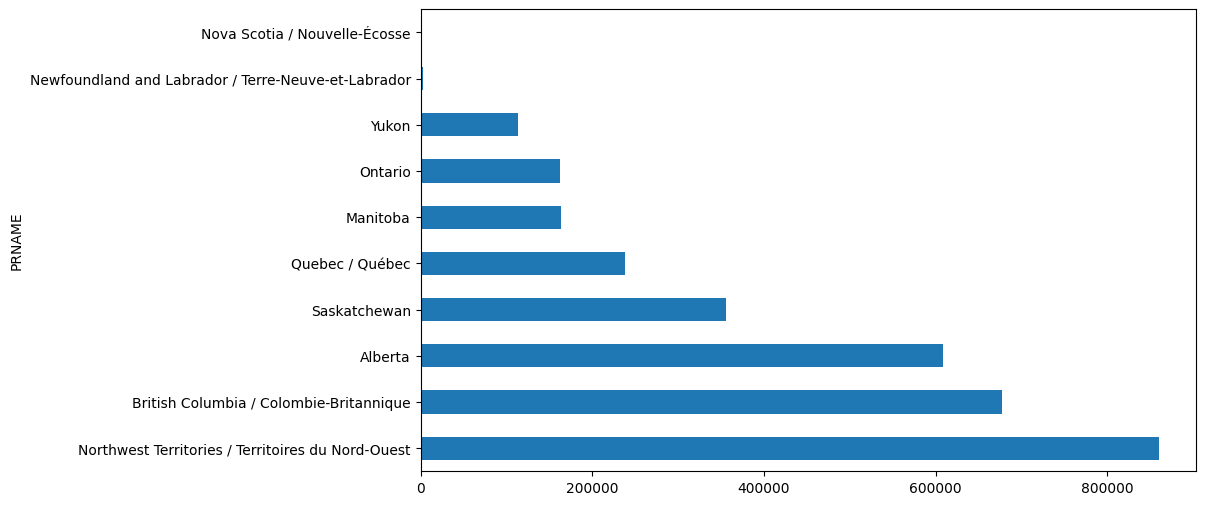

In [15]:
fire_with_province.groupby('PRNAME').size().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10, 6))

In [16]:
fire_with_province.groupby('PRNAME').sum('frp').sort_values(by='frp', ascending=False).head(10)

,latitude,longitude,scan,track,acq_time,bright_t31,frp,index_right,YEAR
PRNAME,,,,,,,,,
Northwest Territories / Territoires du Nord-Ouest,5.400966e+07,-1.019613e+08,396585.18,407838.19,1224729878,2.505807e+08,10448524.68,7739181.0,1739776991
British Columbia / Colombie-Britannique,3.745004e+07,-8.271780e+07,312094.09,322074.65,925719418,1.956643e+08,8584525.67,0.0,1371287572
Alberta,3.526072e+07,-7.022454e+07,278691.99,286888.02,823982783,1.760192e+08,8152633.95,6084080.0,1230543741
Saskatchewan,1.988778e+07,-3.757804e+07,164459.20,169536.53,488306476,1.035297e+08,5102600.38,1425020.0,720587992
Quebec / Québec,1.233117e+07,-1.789110e+07,109891.13,114959.78,281338765,6.915206e+07,3629687.13,237990.0,481444802
Manitoba,8.809726e+06,-1.598627e+07,74690.37,77204.96,212004534,4.747394e+07,2057380.27,978534.0,329718426
Ontario,8.135074e+06,-1.467480e+07,74625.89,77991.73,185867415,4.715786e+07,1832070.90,1139642.0,329094513
Yukon,7.225627e+06,-1.536630e+07,51986.50,53889.65,181399990,3.280006e+07,1326317.00,565645.0,228714799
Newfoundland and Labrador / Terre-Neuve-et-Labrador,1.667153e+05,-1.956043e+05,1530.99,1561.37,4338698,9.346188e+05,76269.91,35222.0,6477238


Top three provinces with most wildfires:
PRNAME
Northwest Territories / Territoires du Nord-Ouest    859909
British Columbia / Colombie-Britannique              677954
Alberta                                              608408
Name: count, dtype: int64
Top four months with most wildfires:
month
July         1045323
August        989767
September     373426
June          359846
Name: count, dtype: int64


/var/folders/w_/g01fvgcn7574lfhnn18vxb9r0000gn/T/ipykernel_99107/1753615807.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(provinces.geometry.centroid.x, provinces.geometry.centroid.y, provinces['PRNAME']):


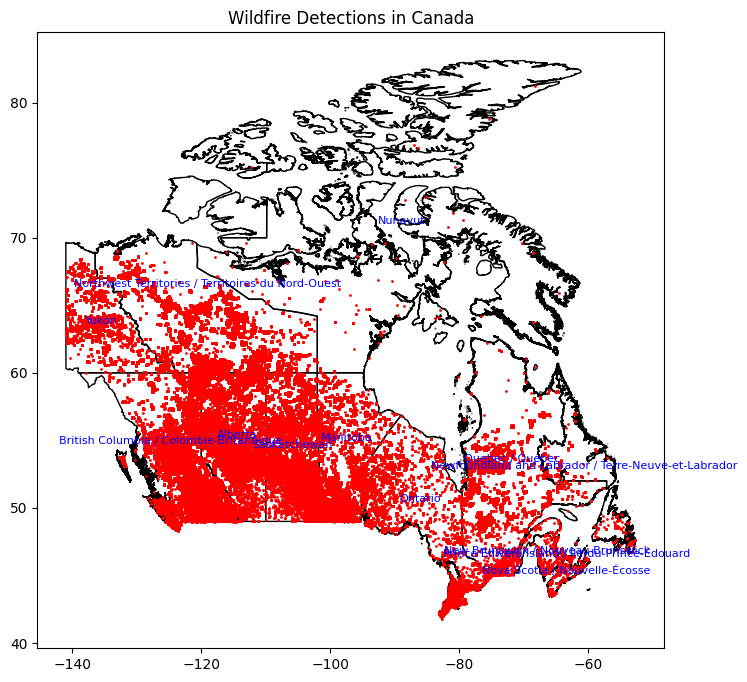

In [17]:
# Step 5: Group by province to get counts of fire detections per province
# Adjust 'NAME' to the appropriate column name in your provinces shapefile if different.
top_provinces = fire_with_province['PRNAME'].value_counts().head(3)
print("Top three provinces with most wildfires:")
print(top_provinces)

# Step 6: Extract the month name from the acquisition date for temporal analysis
NOAA_20_data['month'] = NOAA_20_data['acq_date'].dt.month_name()

# Count the number of fire events per month and get the top four months
top_months = NOAA_20_data['month'].value_counts().head(4)
print("Top four months with most wildfires:")
print(top_months)

# Optional: Plotting the fire locations for a visual check (e.g., using a simple plot)
fig, ax = plt.subplots(figsize=(10, 8))
provinces.plot(ax=ax, color='none', edgecolor='black')
fire_gdf.plot(ax=ax, markersize=1, color='red')

# Add province names to the plot
for x, y, label in zip(provinces.geometry.centroid.x, provinces.geometry.centroid.y, provinces['PRNAME']):
    ax.text(x, y, label, fontsize=8, ha='center', color='blue')

plt.title("Wildfire Detections in Canada")
plt.show()

# 2 : Concat wildfire with 7-day climate

To gain some coorelation of climate change params with the wildfire occurences

* get the climate info for a day range, lat/long for location prec(like 7 days)
* use for loop in the dataset to call the function for each wildfire
* aggregate precipitation, other params
* add the value in the orignal dataset


